<a href="https://colab.research.google.com/github/mafaldasalomao/PAVIC_computer_vision/blob/main/Aula_03_Treinamento__Visao_computacional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing libs
import cv2 as cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import matplotlib.patches as patches
from skimage import io
from PIL import Image as im

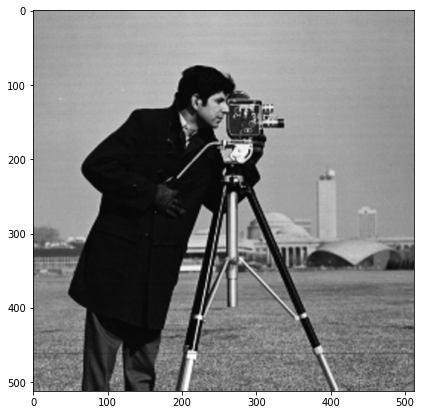

In [5]:
#Read the images
image = mpimg.imread("/content/cameraman.tif")
plt.figure(figsize=(10, 7));
plt.imshow(image, cmap='gray')

In [7]:
def inverte(imagem):
    imagem = (255-imagem)
    return imagem

In [8]:
image = inverte(image)

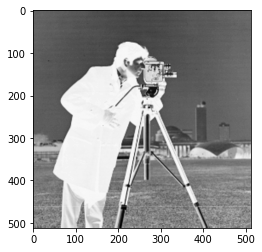

In [12]:
plt.imshow(image, cmap='gray')

In [44]:
img_bgr = mpimg.imread("/content/cameraman.tif")
#img_bgr *=255

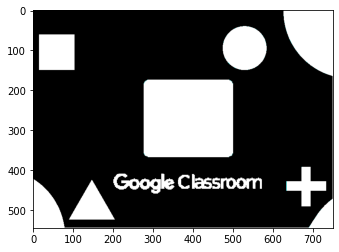

In [47]:
# get height and width of the image

img_bgr = mpimg.imread("/content/classroom.png")
img_bgr *=255
height, width, _ = img_bgr.shape
  
for i in range(0, height - 1):
    for j in range(0, width - 1):
          
        # Get the pixel value
        pixel = img_bgr[i, j]
          
        # Negate each channel by 
        # subtracting it from 255
          
        # 1st index contains red pixel
        pixel[0] = 255 - pixel[0]
          
        # 2nd index contains green pixel
        pixel[1] = 255 - pixel[1]
          
        # 3rd index contains blue pixel
        pixel[2] = 255 - pixel[2]
          
        # Store new values in the pixel
        img_bgr[i, j] = pixel
  
# Display the negative transformed image
plt.imshow(img_bgr)
plt.show()

In [19]:
img_bgr.shape

(545, 751, 4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


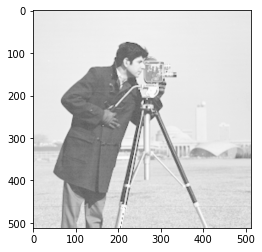

In [37]:
# get height and width of the image

img_bgr = mpimg.imread("/content/cameraman.tif")
# Apply log transform.
c = 255/(np.log(1 + np.max(img_bgr)))
img_log = c * np.log(1 + img_bgr)
# Specify the data type
img_log = np.array(img_log,dtype=np.uint8)
# Display the image
  
# Display the negative transformed image
plt.imshow(img_log, cmap='gray')
plt.show()

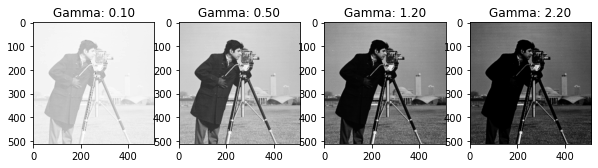

In [42]:
img_bgr = mpimg.imread("/content/cameraman.tif")
# Trying 4 gamma values.
fig, axes = plt.subplots(1, 4, figsize=(10,7))
for i, gamma in enumerate([0.1, 0.5, 1.2, 2.2]):
    # Apply gamma correction.
    gamma_corrected = np.array(255*(img_bgr / 255) ** gamma, dtype = 'uint8')
    axes[i].imshow(gamma_corrected, cmap='gray')
    axes[i].set_title("Gamma: %.2f"% gamma)


In [30]:
axes.shape

(4,)

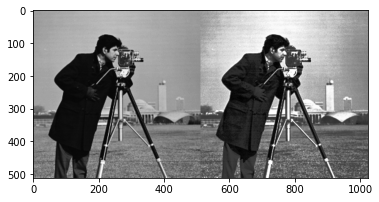

In [51]:
# get height and width of the image

img_bgr = mpimg.imread("/content/cameraman.tif")
equ = cv2.equalizeHist(img_bgr)
res = np.hstack((img_bgr,equ)) #stacking images side-by-side
#img_log = np.array(img_log,dtype=np.uint8)
# Display the image
  
# Display the negative transformed image
plt.imshow(res, cmap='gray')
plt.show()

(-0.5, 1023.5, 511.5, -0.5)

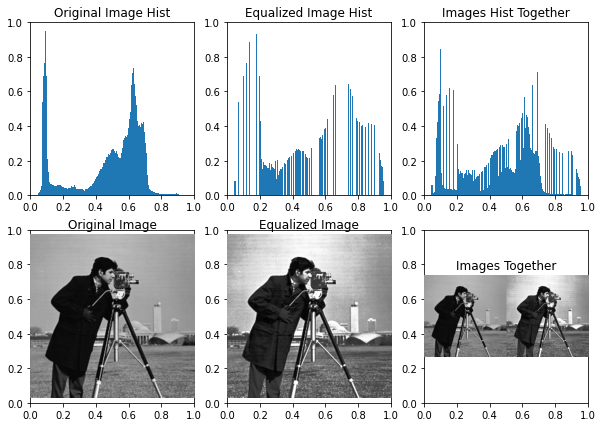

In [68]:
fig, axes = plt.subplots(2, 3, figsize=(10, 7))

fig.add_subplot(2,3,1)
plt.hist(img_bgr.ravel(), bins=256)
plt.title("Original Image Hist")
plt.axis('off')
fig.add_subplot(2,3,4)
plt.imshow(img_bgr, cmap='gray')
plt.title("Original Image")
plt.axis('off')


fig.add_subplot(2,3,2)
plt.hist(equ.ravel(), bins=256)
plt.title("Equalized Image Hist")
plt.axis('off')
fig.add_subplot(2,3,5)
plt.imshow(equ, cmap='gray')
plt.title("Equalized Image")
plt.axis('off')


fig.add_subplot(2,3,3)
plt.hist(res.ravel(), bins=256);
plt.title("Images Hist Together")
plt.axis('off')
fig.add_subplot(2,3,6)
plt.imshow(res, cmap='gray')
plt.title("Images Together")
plt.axis('off')

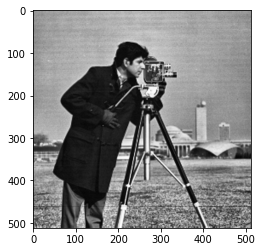

In [71]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
img_bgr = mpimg.imread("/content/cameraman.tif")
cl1 = clahe.apply(img_bgr)

plt.imshow(cl1, cmap='gray')

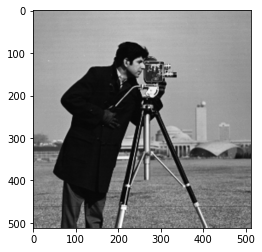

In [72]:
plt.imshow(img_bgr, cmap='gray')

In [73]:
from skimage.io import imread, imshow
from skimage.color import rgb2gray
from skimage import img_as_uint
from scipy.signal import convolve2d

In [74]:
kernel_edgedetection = np.array([[-1, -1, -1],
                                 [-1, 8.5, -1],
                                 [-1, -1, -1]])

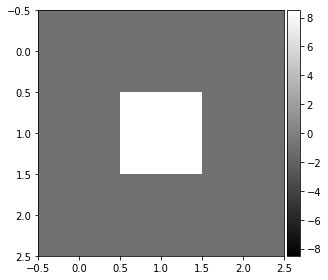

In [75]:
imshow(kernel_edgedetection, cmap = 'gray');

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


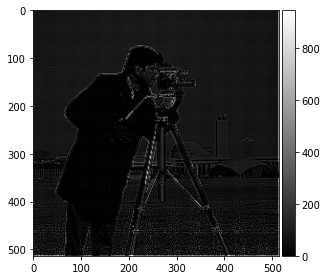

In [76]:
conv_im1 = convolve2d(img_bgr, kernel_edgedetection)
imshow(abs(conv_im1) , cmap='gray');

In [77]:
def edge_detector(image):
    f_size = 15
    morph_gray = rgb2gray(image)
    kernels = [np.array([[-1, -1, -1],
                         [-1, i, -1],
                        [-1, -1, -1]]) for i in range(2,10,1)]    
    
    titles = [f'Edge Detection Center {kernels[k][1][1]}' for k in
              range(len(kernels))]
    
    fig, ax = plt.subplots(2, 4, figsize=(17,12))
    
    for n, ax in enumerate(ax.flatten()):
        ax.set_title(f'{titles[n]}', fontsize = f_size)
        ax.imshow(abs(convolve2d(morph_gray, kernels[n])) , 
                  cmap='gray')
        ax.set_axis_off()
        
    fig.tight_layout()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  This is separate from the ipykernel package so we can avoid doing imports until


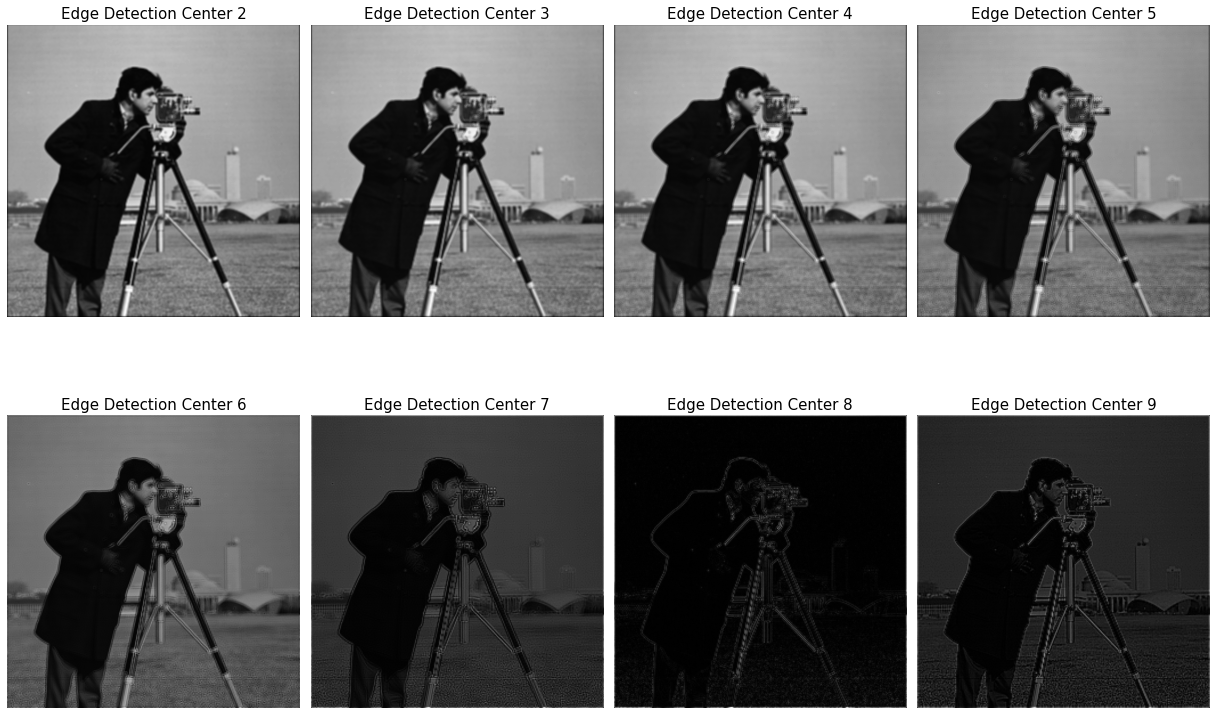

In [78]:
edge_detector(img_bgr)

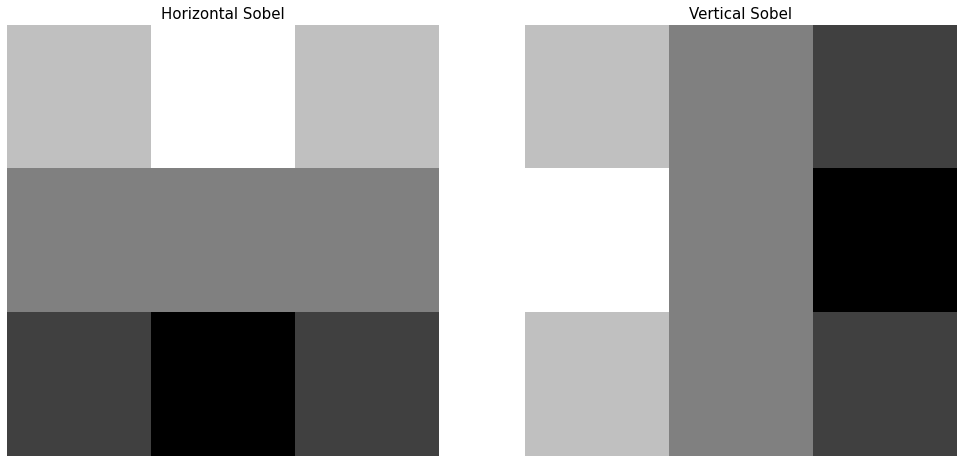

In [79]:
# Horizontal Sobel Filter
h_sobel = np.array([[1, 2, 1],
                    [0, 0, 0],
                    [-1, -2, -1]])
# Vertical Sobel Filter
v_sobel = np.array([[1, 0, -1],
                    [2, 0, -2],
                    [1, 0, -1]])
fig, ax = plt.subplots(1, 2, figsize=(17,12))
ax[0].set_title(f'Horizontal Sobel', fontsize = 15)
ax[0].imshow(h_sobel, cmap='gray')
ax[0].set_axis_off()
ax[1].set_title(f'Vertical Sobel', fontsize = 15)
ax[1].imshow(v_sobel , cmap='gray')
ax[1].set_axis_off()

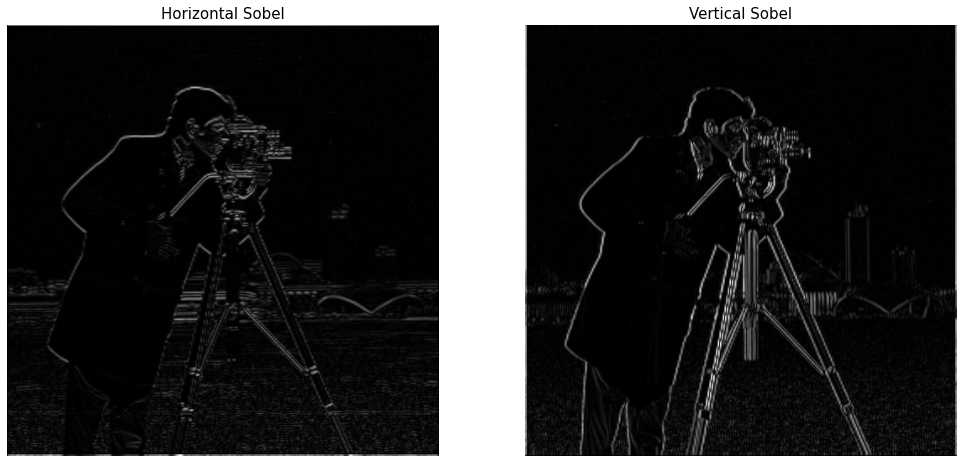

In [81]:
fig, ax = plt.subplots(1, 2, figsize=(17,12))
ax[0].set_title(f'Horizontal Sobel', fontsize = 15)
ax[0].imshow(abs(convolve2d(img_bgr, h_sobel)), cmap='gray')
ax[0].set_axis_off()
ax[1].set_title(f'Vertical Sobel', fontsize = 15)
ax[1].imshow(abs(convolve2d(img_bgr, v_sobel)) , cmap='gray')
ax[1].set_axis_off()

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


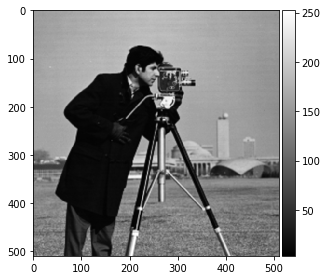

In [85]:
blur = (1 / 16.0) * np.array([[1., 2., 1.],
                                 [2., 4., 2.],
                                 [1., 2., 1.]])
blurred_img = abs(convolve2d(img_bgr, blur, mode = 'valid' ))
imshow(blurred_img , cmap='gray');

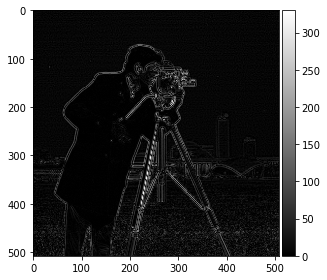

In [86]:
kernel_edgedetection = np.array([[-1, -1, -1],
                                 [-1, 8.05, -1],
                                 [-1, -1, -1]])
blurry_edge_img = abs(convolve2d(blurred_img, kernel_edgedetection, 
                      mode = 'valid'))
imshow( blurry_edge_img , cmap='gray');

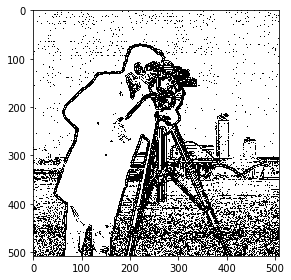

In [87]:
binary_img = img_as_uint(blurry_edge_img < np.mean(blurry_edge_img))
imshow(binary_img , cmap='gray');

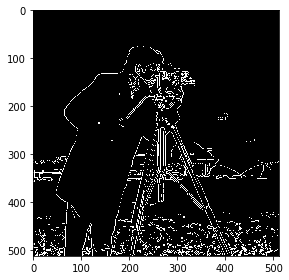

In [88]:
edges = cv2.Canny(img_bgr, 100, 200)

imshow(edges , cmap='gray');

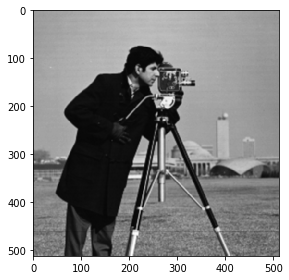

In [92]:
img_blur = cv2.blur(img_bgr, (3,3))
imshow(img_blur , cmap='gray');

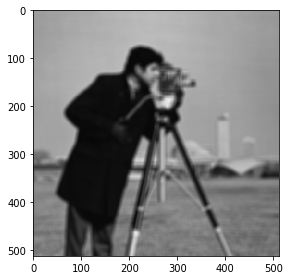

In [94]:
img_blur = cv2.blur(img_bgr, (10,10))
imshow(img_blur , cmap='gray');

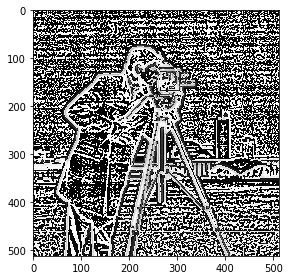

In [95]:
sub_blur_img = img_bgr - img_blur
imshow(sub_blur_img , cmap='gray');

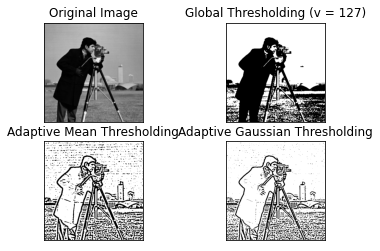

In [96]:
img = cv2.medianBlur(img_bgr,5)

ret,th1 = cv2.threshold(img_bgr,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

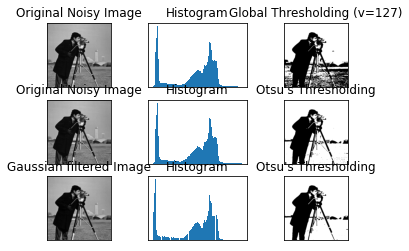

In [97]:
# global thresholding
ret1,th1 = cv2.threshold(img_bgr,127,255,cv2.THRESH_BINARY)

# Otsu's thresholding
ret2,th2 = cv2.threshold(img_bgr,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img_bgr,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# plot all the images and their histograms
images = [img_bgr, 0, th1,
          img_bgr, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()